In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

In [2]:
data = pd.read_csv("miners.csv")

In [3]:
data.head(10)

,Product ID,Product Category,Product Name,Product price,Sizes,Colors,State,AGE,Date,text,class
0,1005,Hoodie,short sleve hoodie,23,L,WHITE,NJ,38,1/1/2017,Absolutely wonderful - silky and sexy and comf...,1
1,1001,Hoodie,graphic hoodie,32,M,RED,NY,54,1/1/2017,Love this dress! it's sooo pretty. i happene...,1
2,1002,Hoodie,half zip hoodie,23,XXL,BLACK,NY,54,1/1/2017,I had such high hopes for this dress and reall...,0
3,8004,Tshirts,cropped tshirt,23,S,WHITE,AZ,19,1/1/2017,"I love, love, love this jumpsuit. it's fun, fl...",1
4,4005,shirts,denim shirt,14,S,BLUE,MI,57,1/1/2017,This shirt is very flattering to all due to th...,1
5,3004,Shoes,work shoes,20,XL,GREEN,CA,45,1/1/2017,"I love tracy reese dresses, but this one is no...",0
6,7003,socks,ribbed socks,12,L,RED,CT,50,1/1/2017,I aded this in my basket at hte last mintue to...,1
7,8002,Tshirts,v neck tshirt,15,XL,GREEN,MI,45,1/1/2017,"I ordered this in carbon for store pick up, an...",1
8,3001,Shoes,formal shoes,23,M,GREEN,CT,25,1/1/2017,I love this dress. i usually get an xs but it ...,1
9,1001,Hoodie,graphic hoodie,32,XXL,BLUE,CT,28,1/1/2017,"I'm 5""5' and 125 lbs. i ordered the s petite t...",1


In [4]:
data.tail()

,Product ID,Product Category,Product Name,Product price,Sizes,Colors,State,AGE,Date,text,class
85993,1001,Hoodie,graphic hoodie,32,XL,GREEN,NY,60,12/31/2017,What a cute top! i would say true to size. it ...,1
85994,2003,Trousers,Shadow Jeans,25,XXL,BLACK,NY,22,12/31/2017,I love workout dresses and skirts. i sport the...,1
85995,4002,shirts,button shirt,13,S,GREEN,MD,23,12/31/2017,I love a crisp white poplin blouse and this to...,1
85996,2005,Trousers,Chinos,24,M,WHITE,CT,40,12/31/2017,"While the styling is cute, the fit was poor un...",0
85997,8001,Tshirts,round neck tshirt,19,XXL,BLUE,MA,59,12/31/2017,"36dd, 10/12 in tops, 12/14 in bottoms\nthis is...",1


In [5]:
data.describe()

,Product ID,Product price,AGE,class
count,85998.000000,85998.000000,85998.000000,85998.000000
mean,4582.634573,18.653899,39.100374,0.822914
std,2945.360456,6.132276,12.399054,0.381743
min,1001.000000,8.000000,18.000000,0.000000
25%,2003.000000,14.000000,28.000000,1.000000
50%,4002.000000,18.000000,39.000000,1.000000
75%,8001.000000,23.000000,50.000000,1.000000
max,9005.000000,32.000000,60.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85998 entries, 0 to 85997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product ID        85998 non-null  int64 
 1   Product Category  85998 non-null  object
 2   Product Name      85998 non-null  object
 3   Product price     85998 non-null  int64 
 4   Sizes             85998 non-null  object
 5   Colors            85998 non-null  object
 6   State             85998 non-null  object
 7   AGE               85998 non-null  int64 
 8   Date              85998 non-null  object
 9   text              82959 non-null  object
 10  class             85998 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.2+ MB


In [7]:
data.isnull()

,Product ID,Product Category,Product Name,Product price,Sizes,Colors,State,AGE,Date,text,class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
85993,False,False,False,False,False,False,False,False,False,False,False
85994,False,False,False,False,False,False,False,False,False,False,False
85995,False,False,False,False,False,False,False,False,False,False,False
85996,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data.isnull().sum()

Product ID             0
Product Category       0
Product Name           0
Product price          0
Sizes                  0
Colors                 0
State                  0
AGE                    0
Date                   0
text                3039
class                  0
dtype: int64

In [9]:
df=data.dropna()

In [10]:
df.isnull().sum()

Product ID          0
Product Category    0
Product Name        0
Product price       0
Sizes               0
Colors              0
State               0
AGE                 0
Date                0
text                0
class               0
dtype: int64

In [11]:
import re
import string

In [12]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [14]:
df["text"] = df["text"].apply(wordopt)

C:\Users\saivi\AppData\Local\Temp/ipykernel_32792/2916151560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(wordopt)


In [15]:
df['text']

0        absolutely wonderful   silky and sexy and comf...
1        love this dress   it s sooo pretty   i happene...
2        i had such high hopes for this dress and reall...
3        i love  love  love this jumpsuit  it s fun  fl...
4        this shirt is very flattering to all due to th...
                               ...                        
85993    what a cute top  i would say true to size  it ...
85994    i love workout dresses and skirts  i sport the...
85995    i love a crisp white poplin blouse and this to...
85996    while the styling is cute  the fit was poor un...
85997        in tops    in bottoms this is a wonderfull...
Name: text, Length: 82959, dtype: object

In [16]:
x=df['text']

In [17]:
y=df['class']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [28]:
pred_dt = DT.predict(xv_test)

In [29]:
DT.score(xv_test, y_test)

0.9954676952748313

In [30]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3712
           1       1.00      1.00      1.00     17028

    accuracy                           1.00     20740
   macro avg       0.99      0.99      0.99     20740
weighted avg       1.00      1.00      1.00     20740



In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
KN = KNeighborsClassifier()
KN.fit(xv_train, y_train)

KNeighborsClassifier()

In [33]:
pred_kn = KN.predict(xv_test)

In [34]:
KN.score(xv_test, y_test)

0.8924783027965284

In [35]:
print(classification_report(y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.72      0.65      0.68      3712
           1       0.92      0.95      0.94     17028

    accuracy                           0.89     20740
   macro avg       0.82      0.80      0.81     20740
weighted avg       0.89      0.89      0.89     20740



In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [38]:
pred_nb = NB.predict(xv_test)

In [39]:
NB.score(xv_test, y_test)

0.8683220829315332

In [40]:
print(classification_report(y_test, pred_nb))

              precision    recall  f1-score   support

           0       0.95      0.28      0.43      3712
           1       0.86      1.00      0.93     17028

    accuracy                           0.87     20740
   macro avg       0.91      0.64      0.68     20740
weighted avg       0.88      0.87      0.84     20740



In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
RF = RandomForestClassifier()
RF.fit(xv_train, y_train)

RandomForestClassifier()

In [44]:
pred_RF=RF.predict(xv_test)

In [45]:
RF.score(xv_test, y_test)

0.9972999035679846

In [46]:
print(classification_report(y_test, pred_RF))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      3712
           1       1.00      1.00      1.00     17028

    accuracy                           1.00     20740
   macro avg       1.00      0.99      1.00     20740
weighted avg       1.00      1.00      1.00     20740



In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
GB = GradientBoostingClassifier()
GB.fit(xv_train, y_train)

GradientBoostingClassifier()

In [50]:
pred_GB=GB.predict(xv_test)

In [51]:
GB.score(xv_test, y_test)

0.8756509161041466

In [52]:
print(classification_report(y_test, pred_GB))

              precision    recall  f1-score   support

           0       0.85      0.37      0.52      3712
           1       0.88      0.99      0.93     17028

    accuracy                           0.88     20740
   macro avg       0.86      0.68      0.72     20740
weighted avg       0.87      0.88      0.85     20740



In [54]:
scores =[DT.score(xv_test, y_test),KN.score(xv_test, y_test),NB.score(xv_test, y_test),RF.score(xv_test, y_test),GB.score(xv_test, y_test)]
algorithms =['Decision Tree','KNN Classification','MultinomialNB','Random Forest','Gradient Boosting']

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

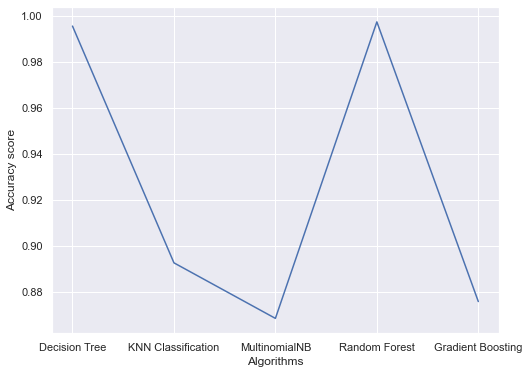

In [62]:
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.lineplot(algorithms,scores)

C:\Users\saivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

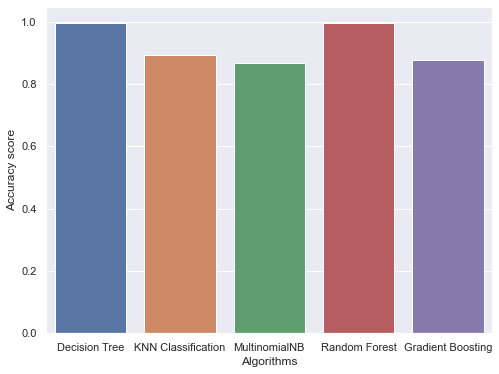

In [58]:
sns.set(rc={'figure.figsize':(8,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)